<h2>EXTRACTING OPPENHEIMER's REVIEW FROM IMDB</h2>


Importing neccesary libraries

In [1]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

In this section, I used web scraping techniques to extract reviews and ratings from the IMDb page of the movie "OPPENHEIMER."

In [11]:
# URL of the IMDb page with reviews
url = 'https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'

# Set up the Selenium WebDriver
driver = webdriver.Chrome()  

# Send a GET request to fetch the webpage content
driver.get(url)
time.sleep(2)

# Click the "Load More" button until it's not present
while True:
    try:
        load_more_button = driver.find_element(By.ID, 'load-more-trigger')
        print("Clicking 'Load More' button")
        load_more_button.click()
        time.sleep(5)  # Increase the delay to ensure proper loading
    except:
        print("Reached end of comments or encountered an error")
        break

# Get the page source after loading all comments
page_content = driver.page_source

# Initialize lists to store comments, ratings, and dates
comments_list = []
ratings_list = []
dates_list = []

# Function to extract comments, ratings, and dates from a page
def extract_data(page_content):
    soup = BeautifulSoup(page_content, 'html.parser')
    comment_elements = soup.find_all('div', class_='text show-more__control')
    rating_elements = soup.find_all('span', class_='rating-other-user-rating')
    date_elements = soup.find_all('span', class_='review-date')
    
    comments = [comment.get_text(strip=True) for comment in comment_elements]
    ratings = [rating.get_text(strip=True) for rating in rating_elements]
    dates = [date.get_text(strip=True) for date in date_elements]
    return comments, ratings, dates

# Extract comments, ratings, and dates from the loaded page
comments, ratings, dates = extract_data(page_content)
comments_list.extend(comments)
ratings_list.extend(ratings)
dates_list.extend(dates)

# Close the browser window
driver.quit()


Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More' button
Clicking 'Load More'

<h2>Data Processing and Cleaning</h2>

After extracting the data, the next steps involve processing, cleaning, and structuring it into a DataFrame.

In [12]:
# Creating a dataframe
comments_list = pd.Series(comments, name='comments')
ratings_list = pd.Series(ratings, name='ratings')
dates_list = pd.Series(ratings, name='dates')
# Create a DataFrame from the extracted data
df = pd.DataFrame({'Date': dates_list, 'Comment': comments_list, 'Rating': ratings_list})
df.describe()


,Date,Comment,Rating
count,2618,1548,2618
unique,10,1546,10
top,10/10,"""Oppenheimer"" is a biographical thriller film ...",10/10
freq,1060,2,1060


Exporting the data into a CSV file

In [13]:
# Save the DataFrame to a CSV file
df.to_csv('oppenheimer_review_with_dates.csv', index=False)

<h2>Analysis Of OPPENHEIMER's Review 

Here, I performed analysis on the extracted data and visualized some key aspects of the reviews.

In [14]:
#Importing neccesary libraries
import matplotlib.pyplot as plt

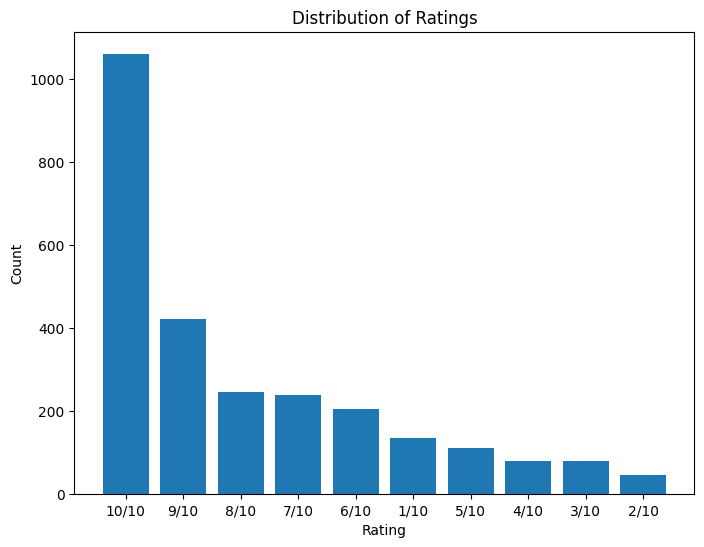

In [15]:
# Analysing rating
rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

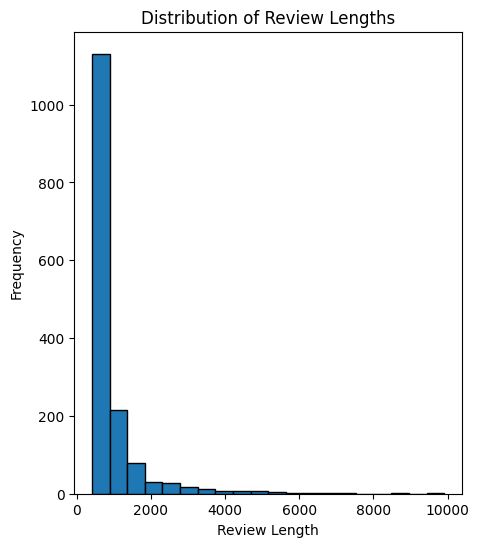

In [16]:
# Analyzing Review lengths
df['comment_length'] = df.dropna()['Comment'].apply(len)
plt.figure(figsize=(5, 6))
plt.hist(df['comment_length'], bins=20, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()